## Analysing the data of quarterly shipments transfer of a certain courier company in the $20^{th}$ century.

#### Basic Libraries import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

#### Reading the data in a quarterly Time Series Format.

In [3]:
df = pd.read_csv('ApplianceShipments.csv')
df

,Quarter,Year,Shipments
0,Q1,1985,4009
1,Q2,1985,4321
2,Q3,1985,4224
3,Q4,1985,3944
4,Q1,1986,4123
5,Q2,1986,4522
6,Q3,1986,4657
7,Q4,1986,4030
8,Q1,1987,4493
9,Q2,1987,4806


In [ ]:
# The data seems to be incorrect, the years should be 1988 and so on

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Quarter    20 non-null     object
 1   Year       20 non-null     int64 
 2   Shipments  20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 612.0+ bytes


In [4]:
df['TimeRange'] = date = pd.date_range(start='1/1/1985', end='1/1/1990', freq='Q')
df.set_index(keys='TimeRange',drop=True,inplace=True)
df

,Quarter,Year,Shipments
TimeRange,,,
1985-03-31,Q1,1985,4009
1985-06-30,Q2,1985,4321
1985-09-30,Q3,1985,4224
1985-12-31,Q4,1985,3944
1986-03-31,Q1,1986,4123
1986-06-30,Q2,1986,4522
1986-09-30,Q3,1986,4657
1986-12-31,Q4,1986,4030
1987-03-31,Q1,1987,4493


#### Ploting the Time Series data.

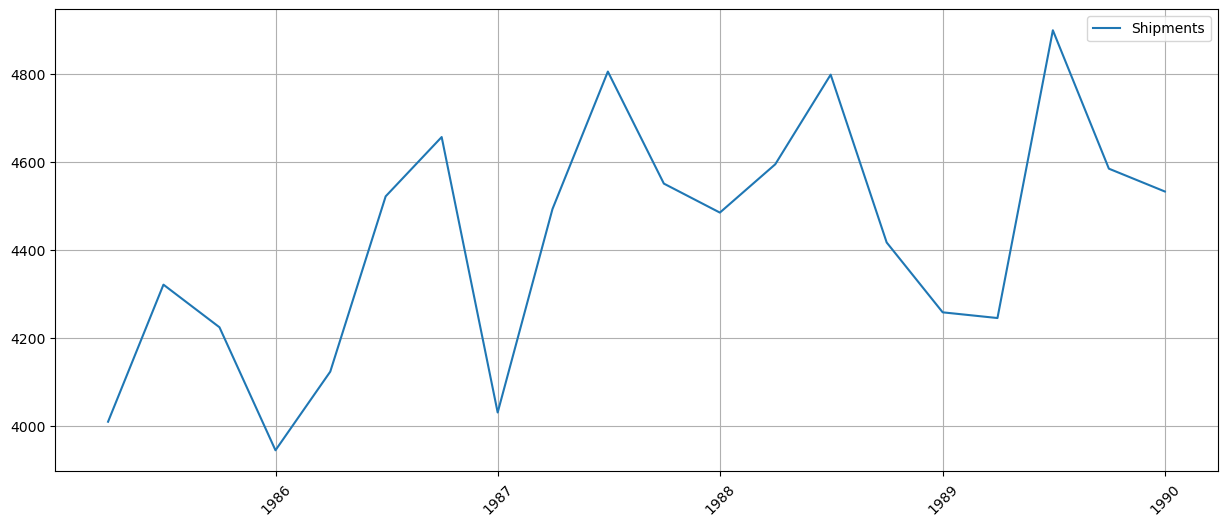

In [90]:
plt.figure(figsize=(15, 6))
plt.plot(df.index, df.Shipments,label='Shipments')
plt.legend(loc='best')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

#### Descriptive statistics for this time series across quarters of different years.

In [93]:
grouped = df.groupby('Quarter')
summary_statistics = grouped['Shipments'].describe()
summary_statistics

,count,mean,std,min,25%,50%,75%,max
Quarter,,,,,,,,
Q1,5.0,4293.0,246.507606,4009.0,4123.0,4245.0,4493.0,4595.0
Q2,5.0,4669.6,240.697528,4321.0,4522.0,4799.0,4806.0,4900.0
Q3,5.0,4486.8,170.784074,4224.0,4417.0,4551.0,4585.0,4657.0
Q4,5.0,4250.0,263.350527,3944.0,4030.0,4258.0,4485.0,4533.0


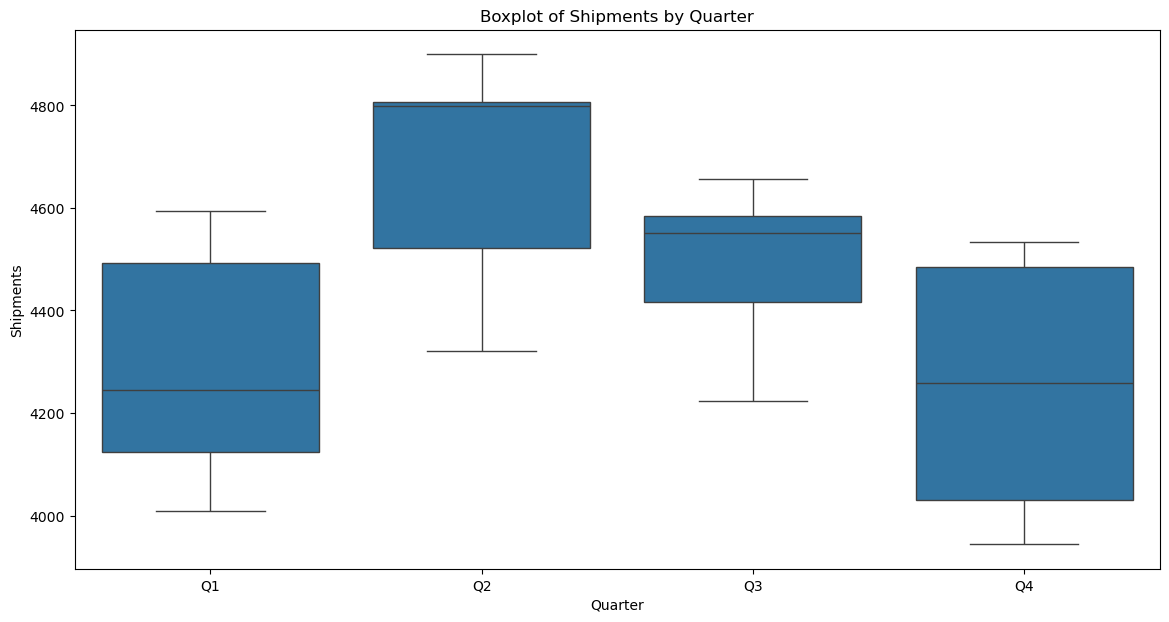

In [70]:
sns.boxplot(x='Quarter', y='Shipments', data=df)
plt.title('Boxplot of Shipments by Quarter')
plt.show()

#### Ploting the Time series along with the mean and median of the Time series in the graph to get an understanding of the fluctuation of the data from these two measures of central tendency.

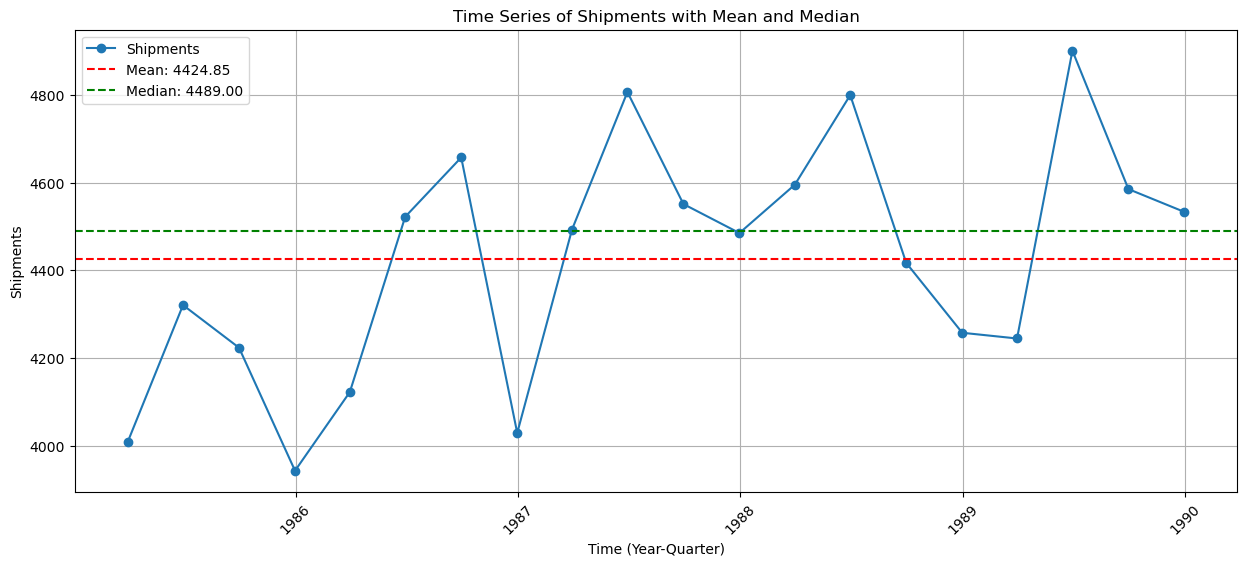

In [94]:
overall_mean = df['Shipments'].mean()
overall_median = df['Shipments'].median()

plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Shipments'], marker='o', linestyle='-', label='Shipments')
plt.axhline(y=overall_mean, color='r', linestyle='--', label=f'Mean: {overall_mean:.2f}')
plt.axhline(y=overall_median, color='g', linestyle='--', label=f'Median: {overall_median:.2f}')
plt.xticks(rotation=45)
plt.title('Time Series of Shipments with Mean and Median')
plt.xlabel('Time (Year-Quarter)')
plt.ylabel('Shipments')
plt.grid(True)
plt.legend()
plt.show()

##### Quarterly comparison of the shipments using a barplot.

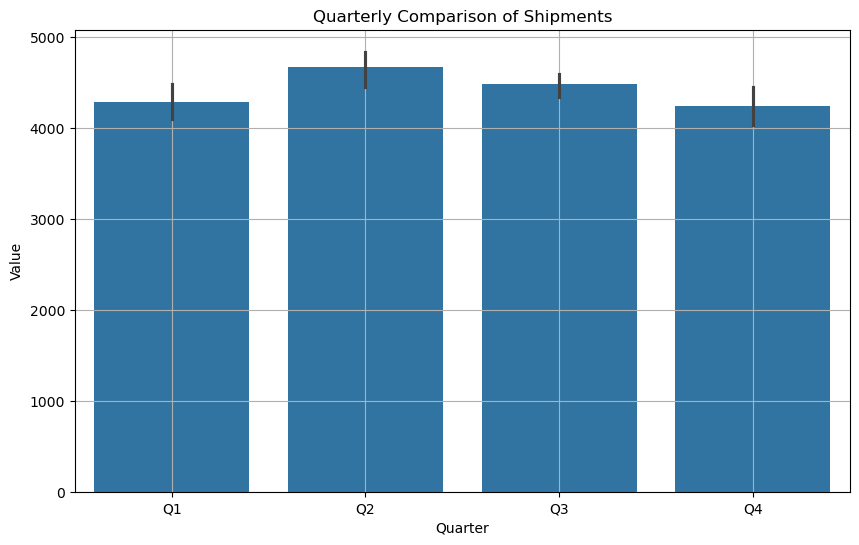

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Quarter', y='Shipments', data=df)
plt.title('Quarterly Comparison of Shipments')
plt.xlabel('Quarter')
plt.ylabel('Value')
plt.grid(True)
plt.show()

#### Year on year quarterly comparison of the shipments.

In [95]:
quarterly_sales_across_years = pd.pivot_table(df, values = 'Shipments', columns = 'Quarter', index = df.index.year)
quarterly_sales_across_years

Quarter,Q1,Q2,Q3,Q4
TimeRange,,,,
1985,4009.0,4321.0,4224.0,3944.0
1986,4123.0,4522.0,4657.0,4030.0
1987,4493.0,4806.0,4551.0,4485.0
1988,4595.0,4799.0,4417.0,4258.0
1989,4245.0,4900.0,4585.0,4533.0


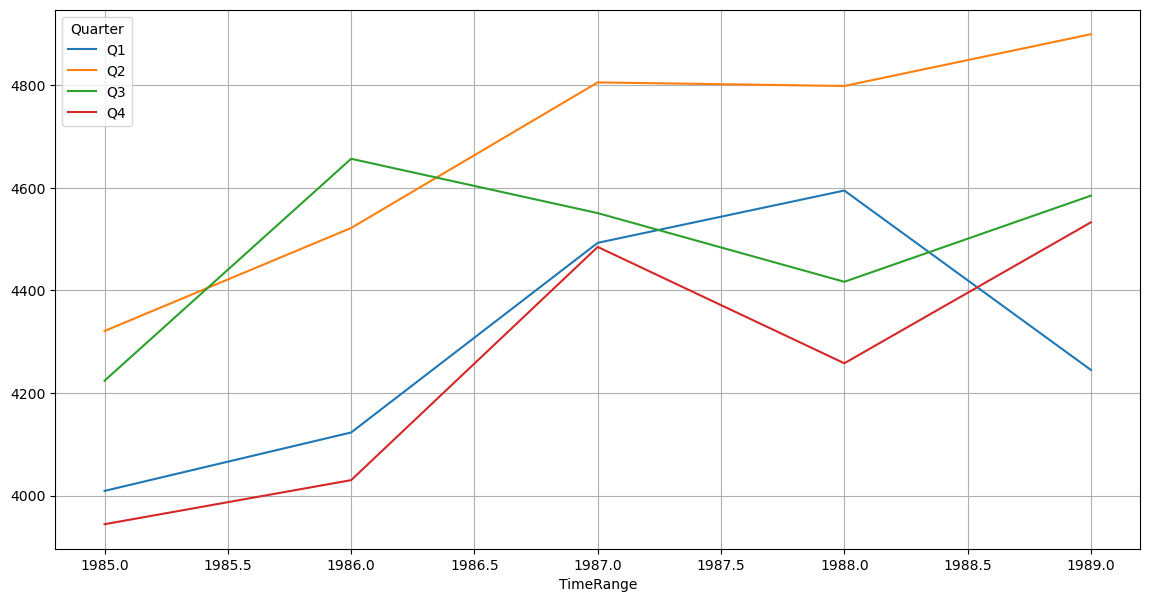

In [96]:
quarterly_sales_across_years.plot()
plt.grid()

#### Distribution plot for quarterly comparison of the shipments.

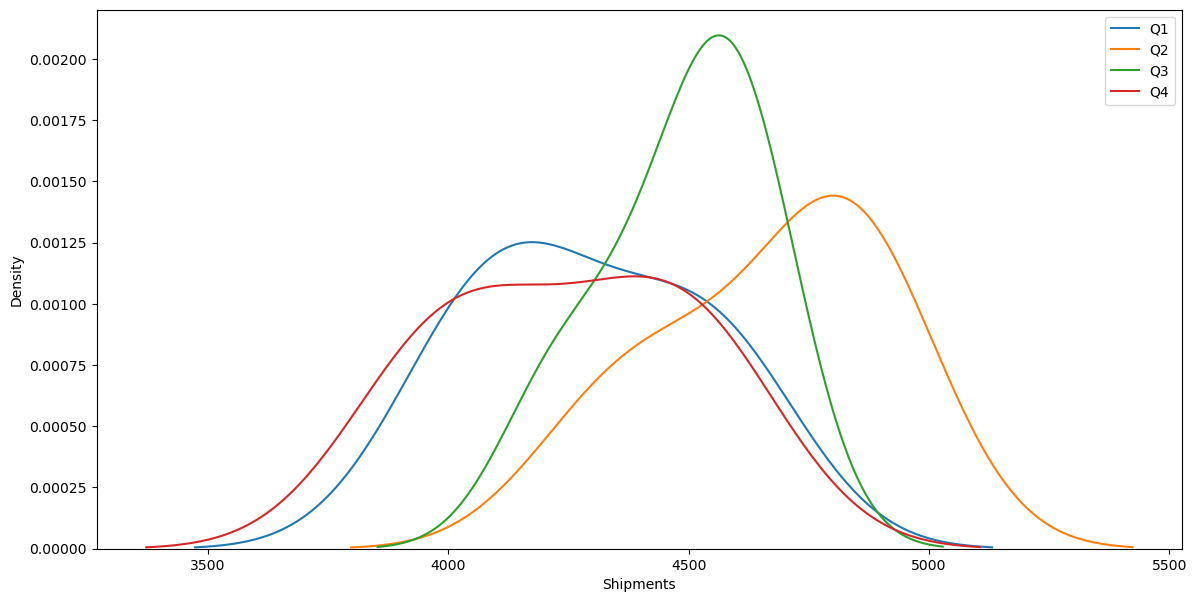

In [81]:
sns.kdeplot(df.loc[df.Quarter == 'Q1']['Shipments'], label= 'Q1')
sns.kdeplot(df.loc[df.Quarter == 'Q2']['Shipments'], label= 'Q2')
sns.kdeplot(df.loc[df.Quarter == 'Q3']['Shipments'], label= 'Q3')
sns.kdeplot(df.loc[df.Quarter == 'Q4']['Shipments'], label= 'Q4')
plt.legend()
plt.show()

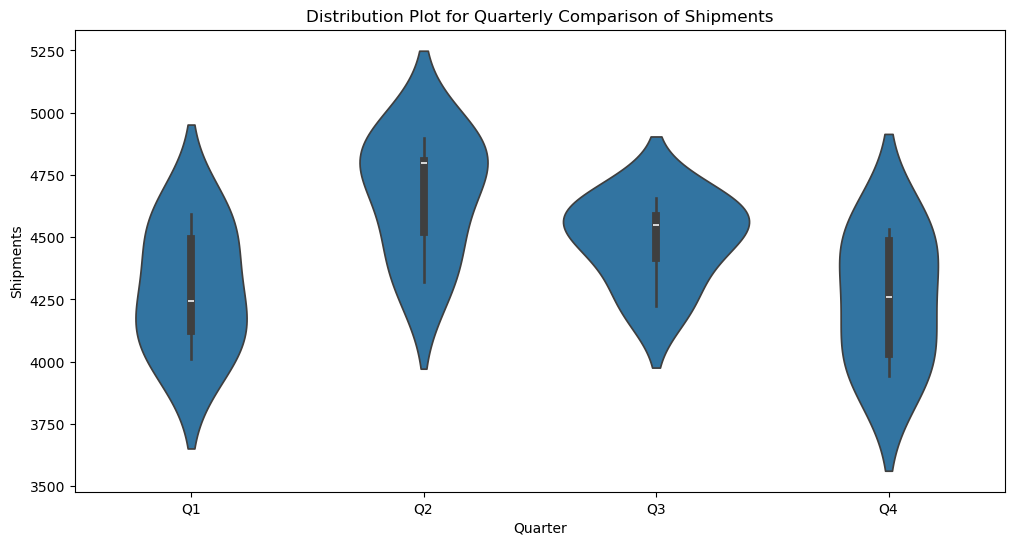

In [27]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Quarter', y='Shipments', data=df)
plt.title('Distribution Plot for Quarterly Comparison of Shipments')
plt.xlabel('Quarter')
plt.ylabel('Shipments')
plt.show()

#### Decomposing the data to check the trend, seasonality and the irregular/residual/error component.

In [5]:
df.drop(columns = ['Quarter','Year'], inplace= True)
df.head()

,Shipments
TimeRange,
1985-03-31,4009
1985-06-30,4321
1985-09-30,4224
1985-12-31,3944
1986-03-31,4123


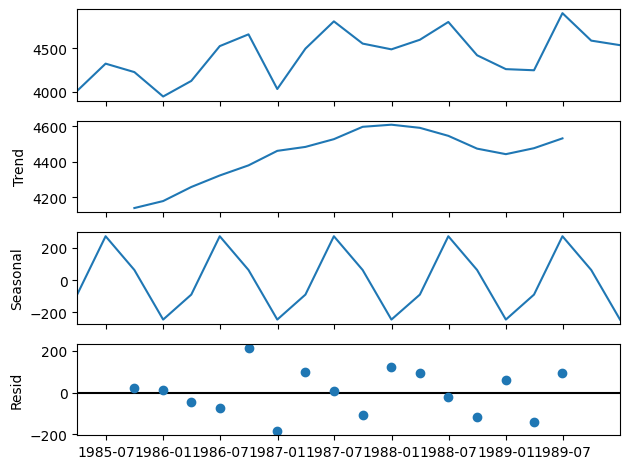

In [6]:
from pylab import rcParams

decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

plt.tight_layout()
plt.show()

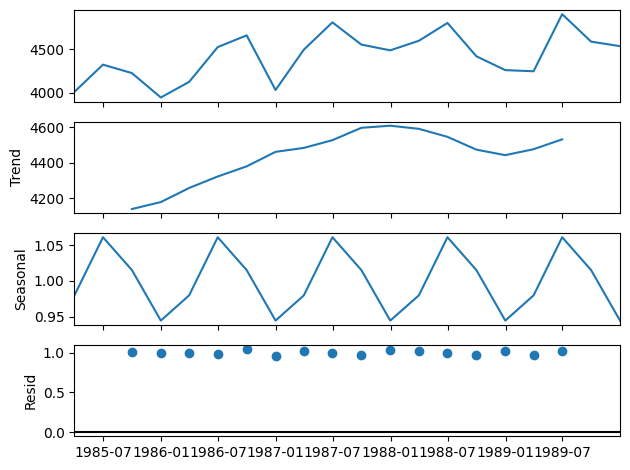

In [7]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

plt.tight_layout()
plt.show()